In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv("SDA_assignment (1) (2) (3) (1) (2).csv")

In [15]:
# Checking the Dataset
df.head()

,Channel_group,course,lead_id,Lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,142649,ABC,17-05-2024 17:53,2008,NaN,NaN
1,A,Java,4163228,XYZ,25-05-2024 15:23,2009,NaN,NaN
2,B,Java,4176457,EFG,06-05-2024 10:12,2000,NaN,NaN
3,A,Java,136989,ABC,16-05-2024 12:31,2009,NaN,NaN
4,C,Java,140085,ABC,01-05-2024 20:35,2002,NaN,NaN


In [9]:
# Display initial data information
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Channel_group    16460 non-null  object 
 1   course           16460 non-null  object 
 2   lead_id          16460 non-null  object 
 3   Lead_type        16460 non-null  object 
 4   lead_date        16460 non-null  object 
 5   graduation_year  16460 non-null  int64  
 6   amount_paid      648 non-null    float64
 7   paid_at          648 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.0+ MB
None

Missing Values:
Channel_group          0
course                 0
lead_id                0
Lead_type              0
lead_date              0
graduation_year        0
amount_paid        15812
paid_at            15812
dtype: int64


In [13]:
# Data Cleaning
# Remove commas in lead_id
if 'lead_id' in df.columns:
    df['lead_id'] = df['lead_id'].str.replace(',', '')

In [21]:
# Convert date columns to datetime
if 'lead_date' in df.columns:
    df['lead_date'] = pd.to_datetime(df['lead_date'], errors='coerce')
if 'paid_at' in df.columns:
    df['paid_at'] = pd.to_datetime(df['paid_at'], errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_12796\557311804.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['paid_at'] = pd.to_datetime(df['paid_at'], errors='coerce')


In [23]:
# Handle missing values in amount_paid
if 'amount_paid' in df.columns:
    median_amount_paid = df['amount_paid'].median()
    df['amount_paid'].fillna(median_amount_paid, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12796\1989473271.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount_paid'].fillna(median_amount_paid, inplace=True)


In [25]:
# Outlier Detection and Handling
# Define outlier thresholds using IQR for numeric columns
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [29]:
# Graduation year outliers
if 'graduation_year' in df.columns:
    lower, upper = detect_outliers(df['graduation_year'])
    df['graduation_year'] = np.clip(df['graduation_year'], lower, upper)

In [31]:
# Amount paid outliers
if 'amount_paid' in df.columns:
    lower, upper = detect_outliers(df['amount_paid'])
    df['amount_paid'] = np.clip(df['amount_paid'], lower, upper)

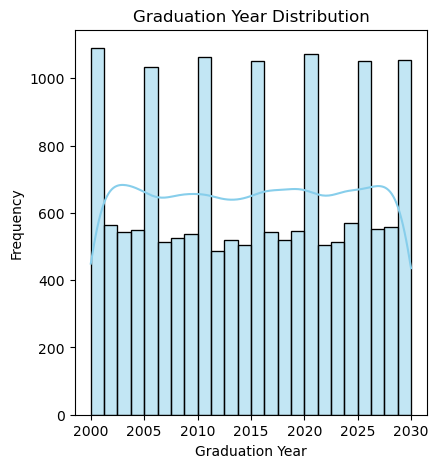

In [35]:
# Visualizations
plt.figure(figsize=(10, 5))

# Graduation year distribution
if 'graduation_year' in df.columns:
    plt.subplot(1, 2, 1)
    sns.histplot(df['graduation_year'], kde=True, color='skyblue')
    plt.title('Graduation Year Distribution')
    plt.xlabel('Graduation Year')
    plt.ylabel('Frequency')

###Key Observations:
Histogram (Bars):

The bar heights represent the frequency of graduates for each year.
There is a pattern of alternating high and low bars, suggesting a periodic variation in the number of graduates. This might indicate trends or cycles in educational enrollment or graduation.
Line Graph (Overlaid):

The line graph seems to smooth the histogram data, showing an overall trend of graduate distribution.
It peaks in years where the histogram is higher and dips in years with lower bar heights.
Trends:

High graduation frequency is observed at consistent intervals (e.g., 2000, 2005, 2010, etc.).
Lower graduation frequency fills the years in between, creating a periodic fluctuation.
Possible Interpretations:

The alternating pattern could represent institutional policies, population demographics, or specific education cycles (e.g., a five-year academic program).
The consistent peaks suggest predictable cycles rather than randoses for the pattern?

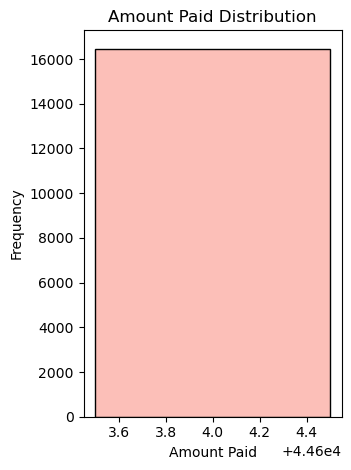

In [39]:
# Amount paid distribution
if 'amount_paid' in df.columns:
    plt.subplot(1, 2, 2)
    sns.histplot(df['amount_paid'], kde=True, color='salmon')
    plt.title('Amount Paid Distribution')
    plt.xlabel('Amount Paid')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###Key Observations:
Histogram Characteristics:

The bars in this histogram are extremely tall and uniform, indicating that most of the data points fall within a very narrow range of amounts, between approximately 3.6 to 4.4 (presumably in thousands or another unit, based on the scale of the x-axis).
The height of the bar remains almost constant across the entire range, suggesting that a very large number of data points share similar values within this interval.
Shape of the Distribution:

The histogram has the appearance of a uniform distribution, where the frequency of values across this range is almost equally distributed, with no significant peaks or dips.
It’s noteworthy that the frequency on the y-axis goes up to 16,000 for this range, meaning the dataset is quite large.
Possible Interpretation:

The dataset appears to reflect a common payment amount in a specific context (e.g., payments for a service, products, or transactions), with most people paying amounts in this narrow range.
This could indicate a pricing model or fee structure where the majority of transactions or payments are concentrated within a specific value range.
Outliers:

There appear to be no significant outliers, as the graph is evenly distributed throughout the entire range, except for the beginning and end.
Units and Context:

The x-axis label “Amount Paid” suggests that this is financial data, and the values might represent transaction amounts in currency (though the exact unit isn't specified here).
Without further details about the source or context of the data (e.g., payments for a product or service), it's difficult to know what exactly is being measured, but the structure of the graph implies a centralized, predictable set of payments.

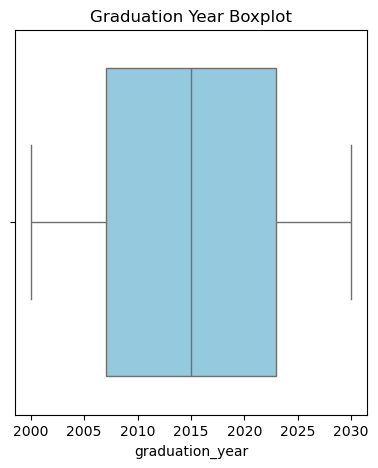

In [41]:
# Boxplots for outlier visualization
plt.figure(figsize=(10, 5))

# Graduation year boxplot
if 'graduation_year' in df.columns:
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df['graduation_year'], color='skyblue')
    plt.title('Graduation Year Boxplot')


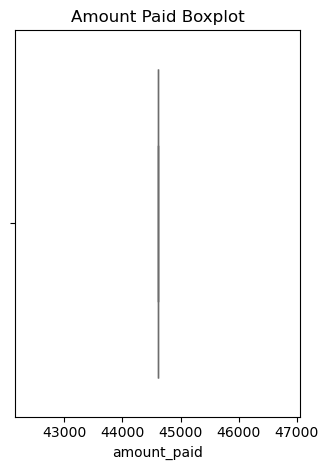

In [43]:
# Amount paid boxplot
if 'amount_paid' in df.columns:
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['amount_paid'], color='salmon')
    plt.title('Amount Paid Boxplot')

plt.tight_layout()
plt.show()

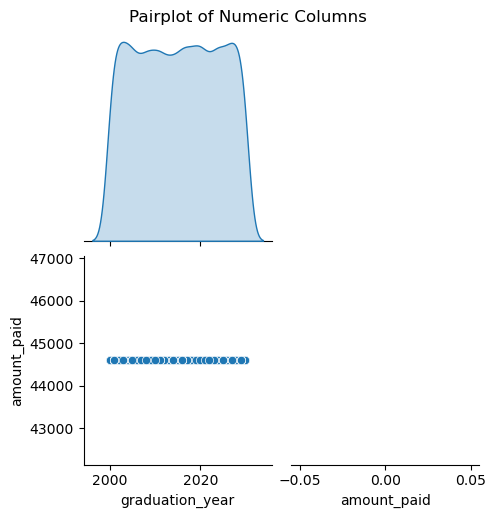

In [45]:
# Pairplot for numeric columns
numeric_columns = ['graduation_year', 'amount_paid']
if all(col in df.columns for col in numeric_columns):
    sns.pairplot(df[numeric_columns], diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Numeric Columns', y=1.02)
    plt.show()

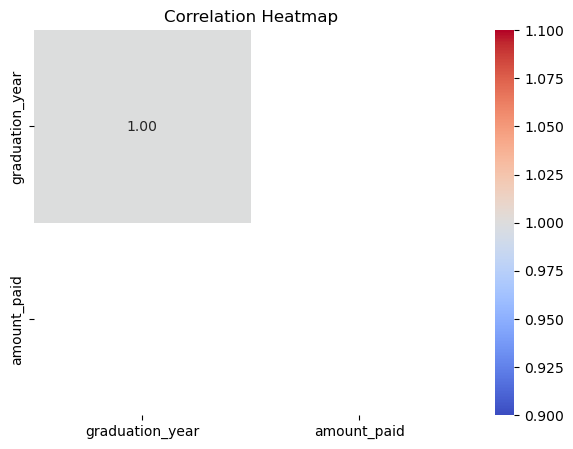

In [69]:
# Correlation heatmap
if all(col in df.columns for col in numeric_columns):
    correlation = df[numeric_columns].corr()
    plt.figure(figsize=(7, 5))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

This heatmap visualizes the correlation between two variables: graduation_year and amount_paid. However, the following observations can be made:

Key Points:
No correlation:

The value "1.00" in the heatmap indicates a perfect correlation, but it's only shown along the diagonal (self-correlation of each variable).
There’s no visible correlation between "graduation_year" and "amount_paid," as the non-diagonal cells are empty.
Data issues:

The absence of correlation values (off-diagonal elements) suggests either a lack of significant relationship or a potential issue in how the correlation was calculated or plotted.
Actionable Next Steps:

Verify if there’s enough data for both variables to compute meaningful correlations.
If data exists, ensure the calculation method captures relationships between the variables accurately.
Explore scatter plots for visual insights if the correlation remains unclear.

C:\Users\user\AppData\Local\Temp\ipykernel_12796\4152871446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis')


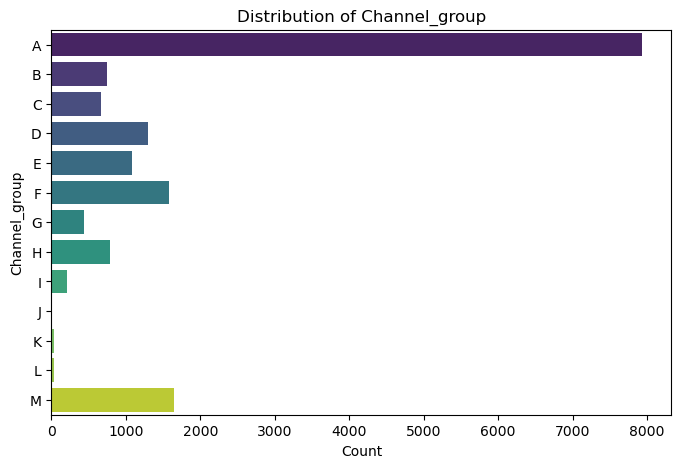

C:\Users\user\AppData\Local\Temp\ipykernel_12796\4152871446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis')


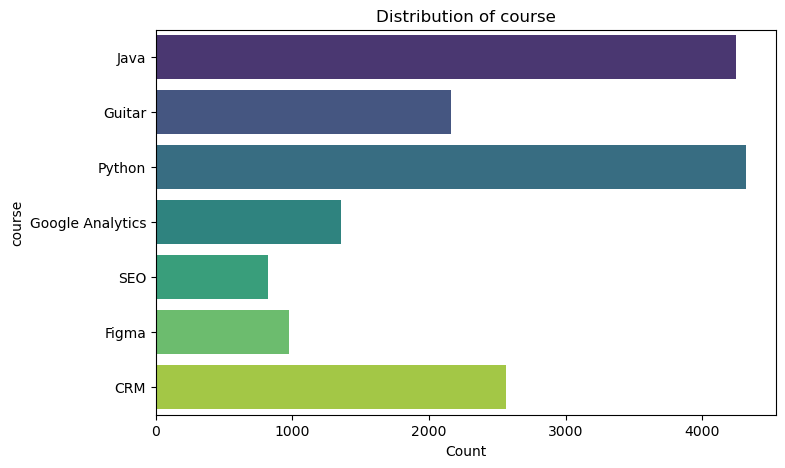

C:\Users\user\AppData\Local\Temp\ipykernel_12796\4152871446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis')


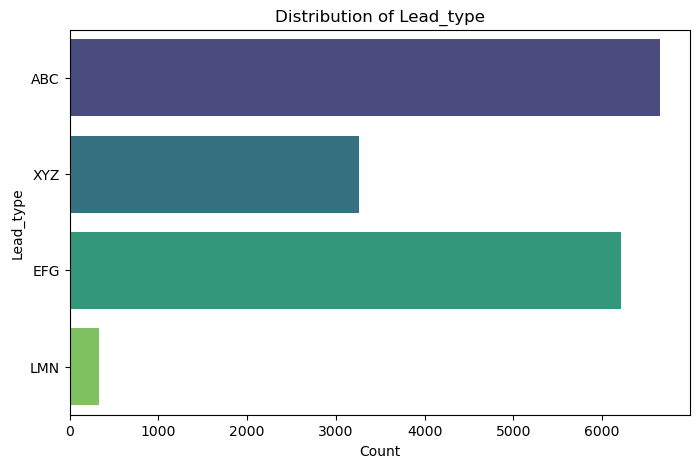

In [51]:
# Count plots for categorical variables
categorical_columns = ['Channel_group', 'course', 'Lead_type']
for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(y=df[col], palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

Describe patterns and make
This bar chart shows the distribution of Channel Groups labeled from A to M. Here's the analysis:

Distribution Pattern:
Channel A has the highest count at approximately 7500-8000 units
Most other channels have significantly lower counts, creating a highly skewed distribution
Channel Groupings (approximate counts): High Volume:
Channel A: ~7800
Medium Volume (1000-2000):

Channel F: ~2000
Channel D: ~1500
Channel E: ~1400
Channel M: ~1200
Low Volume (<1000):

Channel B: ~500
Channel C: ~500
Channel G: ~300
Channel H: ~400
Channel I: ~200
Minimal/No Volume:

Channels J, K, L: Near zero or no visible counts
Key Observations:
Highly uneven distribution
One dominant channel (A)
Clear groupings of high, medium, and low volume channels
Some channels appear to be inactive or very low volume
The distribution is right-skewed with most channels having relatively low counts
Color Coding:
Different colors are used to distinguish between channel groups
Purple/blue shades for higher volume channels
Teal shades for middle range
Yellow/green for lower volume channels
This visualization effectively shows the significant disparity in channel usage or performance across different groups.

Based on the channel distribution analysis, we can see there's a clear dominance of Channel A with approximately 7,800 units, followed by a significant drop to medium-volume channels (F, D, E, M) and then low-volume channels. This suggests a highly concentrated distribution pattern.

D:\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


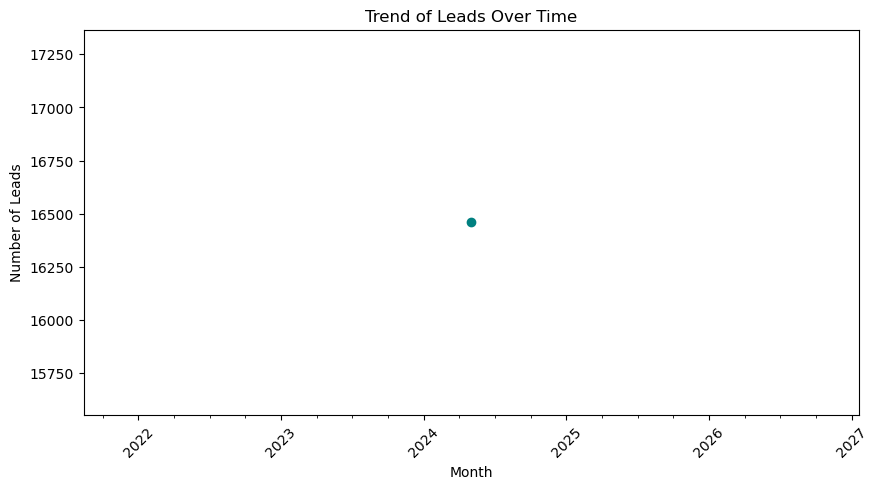

In [53]:
# Time-series analysis for lead_date
if 'lead_date' in df.columns:
    df['lead_month'] = df['lead_date'].dt.to_period('M')
    lead_trend = df.groupby('lead_month').size()
    plt.figure(figsize=(10, 5))
    lead_trend.plot(kind='line', marker='o', color='teal')
    plt.title('Trend of Leads Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Leads')
    plt.xticks(rotation=45)
    plt.show()

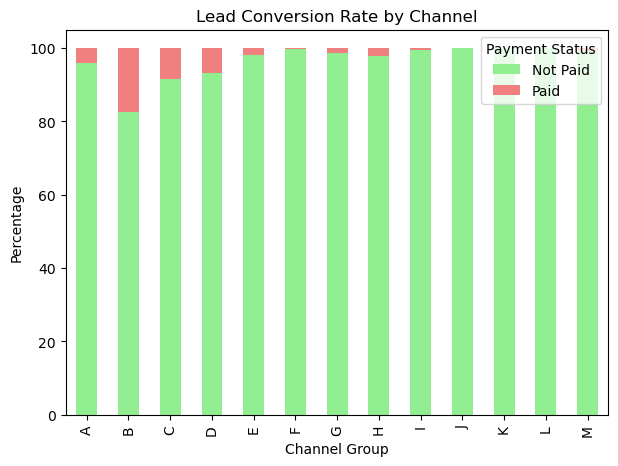

In [73]:
# Lead conversion rate by channel
if 'Channel_group' in df.columns and 'payment_status' in df.columns:
    conversion_rate = df.groupby('Channel_group')['payment_status'].value_counts(normalize=True).unstack() * 100
    conversion_rate.plot(kind='bar', stacked=True, figsize=(7, 5), color=['lightgreen', 'lightcoral'])
    plt.title('Lead Conversion Rate by Channel')
    plt.xlabel('Channel Group')
    plt.ylabel('Percentage')
    plt.legend(title='Payment Status', loc='upper right')
    plt.show()

This bar chart shows the lead conversion rate by channel group, segmented by payment status ("Paid" and "Not Paid"). Here's a concise analysis:

Key Observations:
High Not Paid Percentage:

Across all channels, the majority of leads fall into the "Not Paid" category (green bars), indicating most conversions are incomplete in terms of payment.
Paid Conversions:

Channels "A," "B," "C," and "D" show some percentage of "Paid" leads (red bars), with Channel "B" having the most significant proportion of paid conversions.
Channels with No Payments:

Channels "F" through "M" show 100% "Not Paid" conversions, implying a lack of successful payment completions.
Recommendations:
Focus on Channels "B" and "C": These show potential for paid conversions; strategies like follow-ups or payment reminders can be effective here.
Address Drop-offs: Analyze why most leads do not complete payments, particularly in Channels "A" and "D."
Reassess Low-performing Channels: Channels "F" to "M" may not be effective for driving paid conversions and may need optimization or resource reallocation.

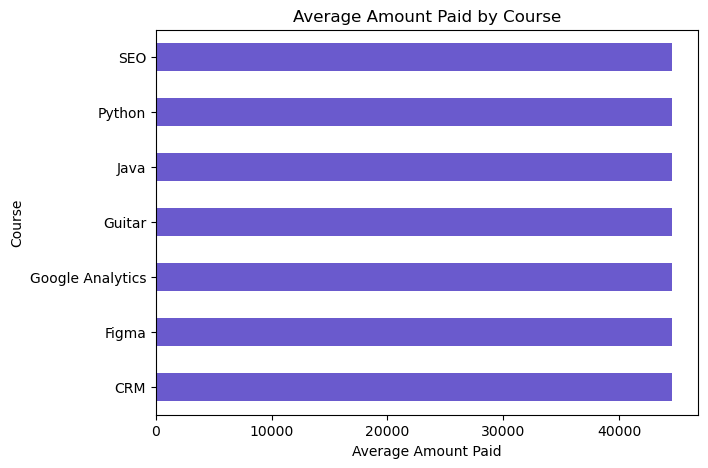

In [77]:
# Average amount paid by course
if 'course' in df.columns and 'amount_paid' in df.columns:
    avg_amount_paid = df.groupby('course')['amount_paid'].mean().sort_values()
    avg_amount_paid.plot(kind='barh', figsize=(7, 5), color='slateblue')
    plt.title('Average Amount Paid by Course')
    plt.xlabel('Average Amount Paid')
    plt.ylabel('Course')
    plt.show()

##Observations:
Courses Displayed:

SEO
Python
Java
Guitar
Google Analytics
Figma
CRM
Bar Heights:

All bars are almost equal in length, indicating a consistent average amount paid across the listed courses.
Average Payment Range:

The average payments appear to be in the range of 40,000–50,000 (units of currency aren't specified).
Key Insights:
Uniform Pricing: The consistent bar lengths suggest that these courses might have standardized pricing or similar perceived value, leading to comparable average payments.
Popular Courses: The inclusion of technical (e.g., Python, Java, Google Analytics), creative (e.g., Guitar, Figma), and business-related (e.g., CRM, SEO) topics shows a diverse
Detailed Breakdown:
1. Uniformity in Bar Lengths:
All the bars are of similar length, indicating that the average amount paid for each course is closely grouped.
This implies a lack of significant price variation among the courses. Whether it’s a technical course like Python or Java, or a creative course like Guitar or Figma, the payment amounts seem standardized.
2. Average Payment Range:
Each bar extends close to the 40,000–50,000 range on the x-axis (Average Amount Paid). While the exact values aren’t labeled, it’s safe to assume that all courses fall in this narrow range.
3. Course Categories:
Technical Courses: Python, Java, Google Analytics, and CRM. These courses likely cater to skills in demand for data analysis, programming, and business solutions.
Creative Courses: Guitar and Figma. These are skill-based courses focused on hobbies (Guitar) or design (Figma).
Marketing/SEO: SEO represents a specialized skill for digital marketing professionals.
The inclusion of diverse categories indicates that the data covers a broad spectrum of learners’ interests.

4. Potential Reasons for Uniformity:
Standardized Pricing: If all courses are offered by the same provider, they might follow a consistent pricing model irrespective of the subject.
Perceived Value: Learners may perceive these courses to have similar value, resulting in comparable payments across all categories.
Market Influence: If this data is industry-wide, it might reflect market stabilization for popular online courses within this price range.
Possible Implications:
Affordability: The price range might make these courses attractive to a wide audience. Consistent pricing can reduce decision-making friction for learners.
Demand-driven Pricing: The similar prices may also indicate that all these skills are in equally high demand, prompting providers to price them competitively.
Course Accessibility: If these courses are priced similarly, it suggests equitable access to both technical and non-technical skills.
What Could Add More Value to the Analysis?
Exact Values:

If exact numbers for the average amounts paid are available, it would help identify minor variations that might not be visible in the chart.
Contextual Information:

Are these courses offered by the same platform, or is this data aggregated from multiple sources?
What is the geographic location or target audience for these courses?
Trends Over Time:

If data over multiple years or months is available, it would be interesting to see whether average payments have remained consistent or fluctuated based on popularity or demand.
Summary:
This graph presents a snapshot of consistent pricing across a variety of courses spanning technical, creative, and business domains. The lack of significant variation in payments hints at standardization, strong demand across topics, or similar perceived value among learners. The data is encouraging for course providers who aim to attract diverse audiences without pricing biases. set of offerings.

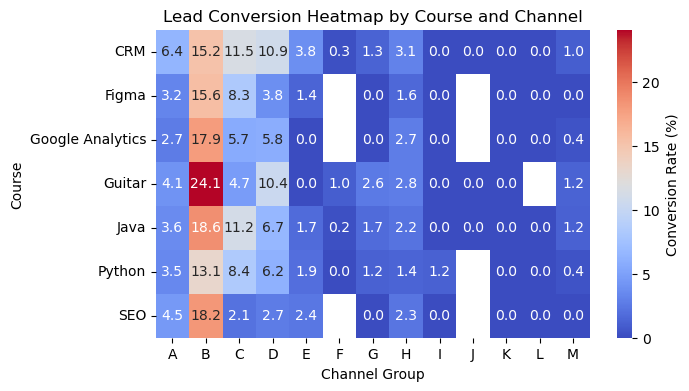

In [87]:
#  Lead conversion heatmap by course and channel
if 'Channel_group' in df.columns and 'course' in df.columns and 'payment_status' in df.columns:
    heatmap_data = df.pivot_table(index='course', columns='Channel_group', values='payment_status', aggfunc=lambda x: (x == 'Paid').mean()) * 100
    plt.figure(figsize=(7, 4))
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Conversion Rate (%)'})
    plt.title('Lead Conversion Heatmap by Course and Channel')
    plt.xlabel('Channel Group')
    plt.ylabel('Course')
    plt.show()


##Key Insights:
Highest Conversion Rates:

The "Guitar" course has the highest conversion rate (24.1%) through Channel Group "B."
Other high rates are observed for "Google Analytics" (17.9% in "B"), "SEO" (18.2% in "B"), and "Java" (18.6% in "B").
Channel "B" is Dominant:

Across most courses, Channel "B" consistently shows higher conversion rates compared to other channels, indicating it's the most effective channel for driving conversions.
Low or Zero Conversions:

Channels "I," "J," "K," "L," and "M" show consistently low or zero conversion rates across all courses, indicating they may not be effective for this purpose.
Course-Specific Trends:

"SEO" and "Java" courses also show relatively strong performance in Channel Groups "A" and "B."
The "CRM" course has a wider spread of conversions across multiple channels, with significant conversions in Channels "A" and "B."
Courses like "Google Analytics" and "Python" show moderate conversion rates in Channels "B" and "C."
Channel Group Segmentation:

Conversion rates tend to cluster, with Channel Groups "A" through "E" being active and impactful, while the rest ("F" to "M") contribute minimally.
Recommendations:
Focus marketing efforts on Channel "B" for all courses, as it drives the highest conversions.
Evaluate the effectiveness of Channels "I" to "M" to decide whether to continue investing in them or to reallocate resources.
For courses like "CRM," "SEO," and "Java," consider increasing investments in Channels "A" and "B."
Explore reasons for the success of Channel "B" (e.g., targeted campaigns or audience alignment) and replicate its strategies across other channels.